In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from src.models.regression.evaluate_models import RegressionAnalysis
from src.models.regression.train_models import RegressionTraining
from src.visualization.styles.formatting import errorbar_kwargs
from src.utils.constants import REGRESSION_TARGET_NAMES

In [2]:
samples_per_composition = 30

training = RegressionTraining(samples_per_composition=samples_per_composition)
analysis = RegressionAnalysis(samples_per_composition=samples_per_composition)

results = training.load_training_models()
indices = analysis.load_performance_indices()

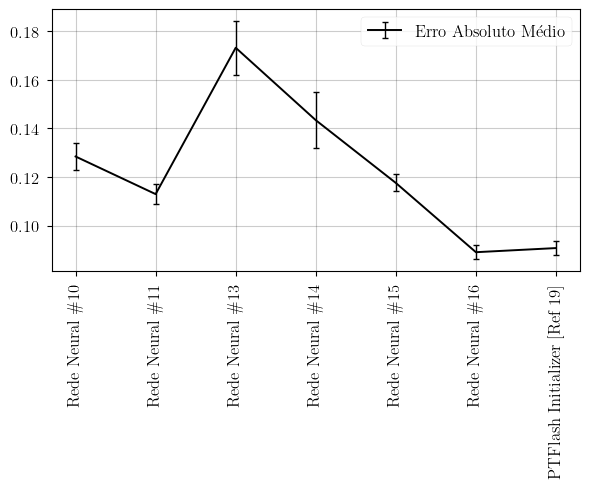

In [21]:
outputs = results["outputs"]
models_id = np.array([10, 11, 13, 14, 15, 16, 18])
# models_id = np.arange(1, 19)
selected_outputs = [o for o in outputs if o["model_id"] in models_id]

labels = [hp["model_name"].replace("#", "\#") for hp in outputs if hp["model_id"] in models_id]
x = np.array([i + 1 for i in np.arange(len(labels))])
k_folds = 10
indices_names=["mean_absolute_error"]

by_model = True

if by_model:
    f1, axs1 = plt.subplots(len(indices_names), 1, figsize=(6, 5 * len(indices_names)), sharex=True)
    for i, name in enumerate(indices_names):
        ax1 = axs1[i] if len(indices_names) > 1 else axs1
        y = indices[name].mean(axis=(0, 2))[models_id - 1]
        y_err = (indices[name].mean(axis=2).std(axis=0) / np.sqrt(k_folds - 1))[models_id - 1]
        ax1.errorbar(x, y, y_err, c=f"C{i}", label="Erro Absoluto Médio", **errorbar_kwargs)
        ax1.grid()
        ax1.set_xticks(x, labels, rotation=90, ha="center")
        ax1.legend()
    f1.tight_layout()
    f1.savefig(os.path.join("data", "images", f"{name}_errorbar_plot_by_model.png"), dpi=600)
else:
    indices_names = ["mean_absolute_error"]
    x = np.array([i + 1 for i in np.arange(len(REGRESSION_TARGET_NAMES))])

    for j, output in enumerate(selected_outputs):
        model_id = output["model_id"]
        f, axs = plt.subplots(len(indices_names), 1, figsize=(6, 4 * len(indices_names)), sharex=True)
        for i, name in enumerate(indices_names):
            kwargs = {"label": name, **errorbar_kwargs}
            ax = axs[i] if len(indices_names) > 1 else axs
            y = indices[name].mean(axis=0)[j, :]
            y_err = indices[name].std(axis=0)[j, :] / np.sqrt(k_folds - 1)
            ax.errorbar(x, y, y_err, c=f"C{i}", **kwargs)
            ax.yaxis.grid()

            def fix_ticks1(name):
                var, component = name.split("_")
                return "$" + var + "_{" + component + "}$"

            def fix_ticks2(name):
                char1, char2 = name[0], name[-1]
                return "$" + char1 + "_{" + char2 + "}$"

            ticks1 = [fix_ticks1(name) for name in REGRESSION_TARGET_NAMES[:-1]]
            ticks2 = [fix_ticks2(name) for name in REGRESSION_TARGET_NAMES[-1:]]
            ax.set_xticks(x, ticks1 + ticks2, rotation=90, ha="center")
            ax.legend()
        f.tight_layout()
        # f.savefig(os.path.join("data", "images", f"errorbar_plot_by_target_model_id={model_id}.png"), dpi=600)